In [1]:
import numpy as np
from pathlib import Path
from ec4py import Quantity_Value_Unit as QV
from ec4py import *
import math

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153559_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153541_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153333_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151300_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151725_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151512_ 3.tdms")



c:\Users\gusta\Documents\GitHub\Python\NordicEC\EC4py\test_data\CV


bb aaa


(<matplotlib.lines.Line2D at 0x20b4e052fd0>,
 <Axes: xlabel='E vs aaa (V)', ylabel='i A$^{-1}$ (A m$^{-2}$)'>)

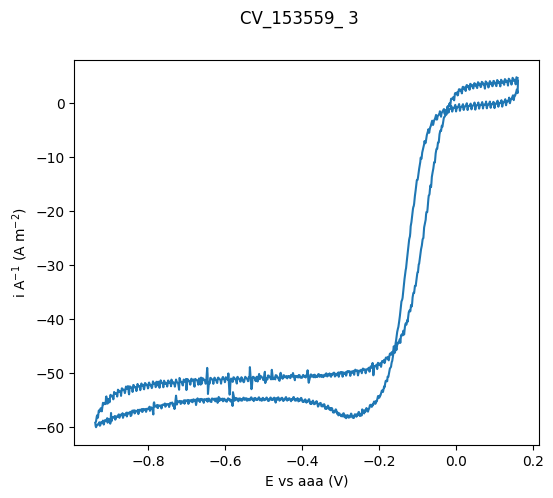

In [3]:
data = CV_Data(paths[0])
data.RE = "aaa"
print("bb",data.RE)
data.plot("area")


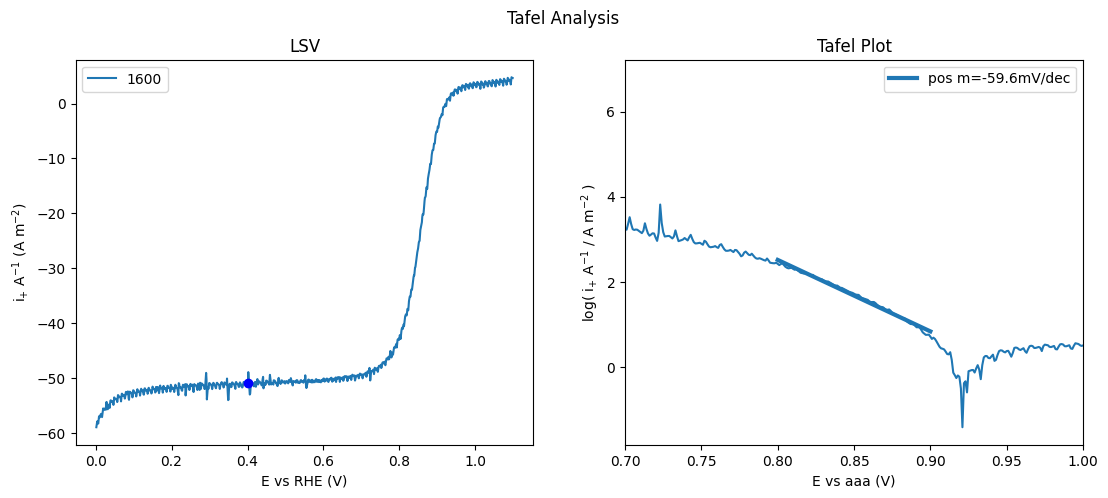

In [4]:
a= data.get_sweep(POS)
a.Tafel([0.8,0.9],0.4,RHE,AREA)



(<ec4py.util.Quantity_Value_Unit at 0x20b56c02810>,
 <ec4py.util.Quantity_Value_Unit at 0x20b56c25610>)

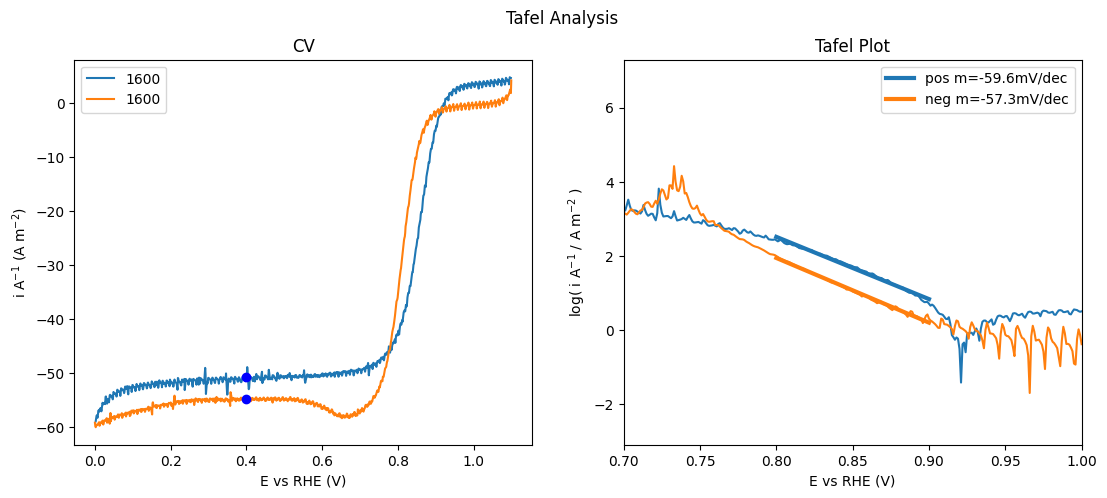

In [12]:
data.Tafel([0.8,0.9],0.4,RHE,AREA)



POS -0.05956184510535979 -0.0573323825384856
-0.05956184510535979
-0.0573323825384856
-0.0636586895445107


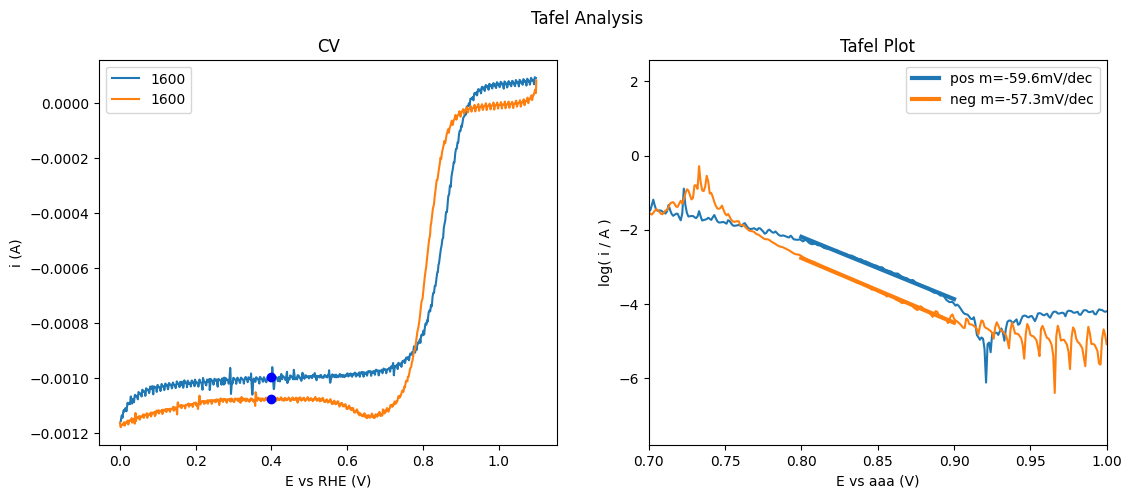

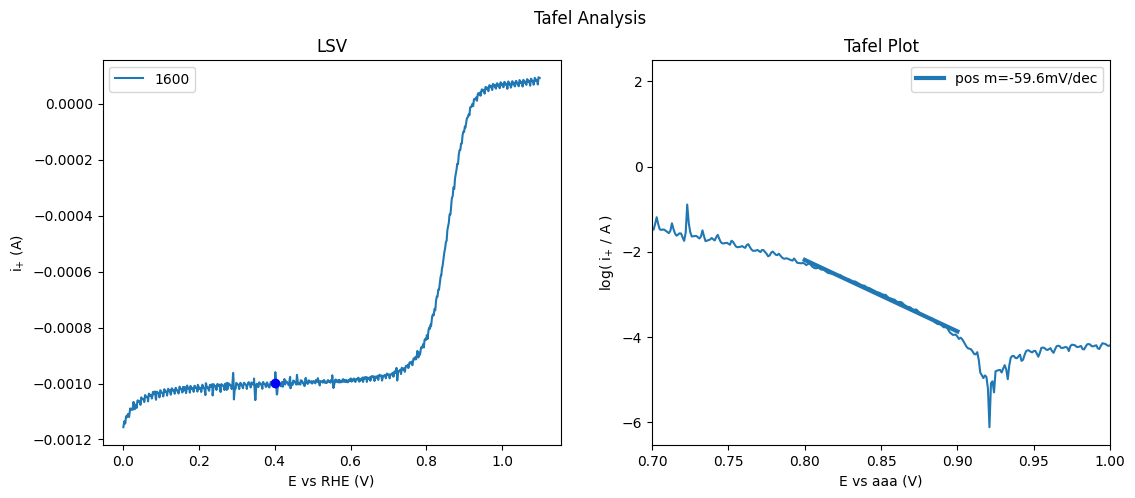

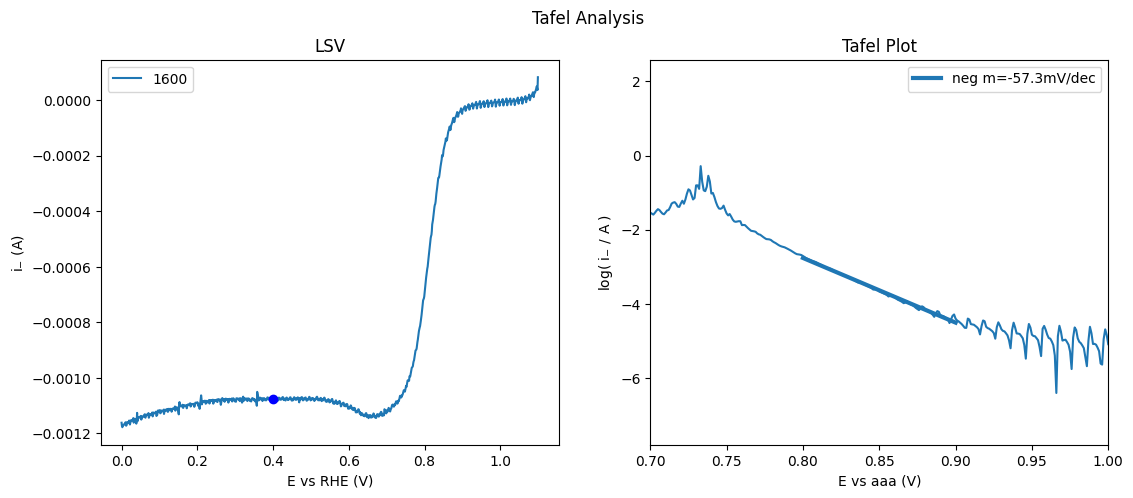

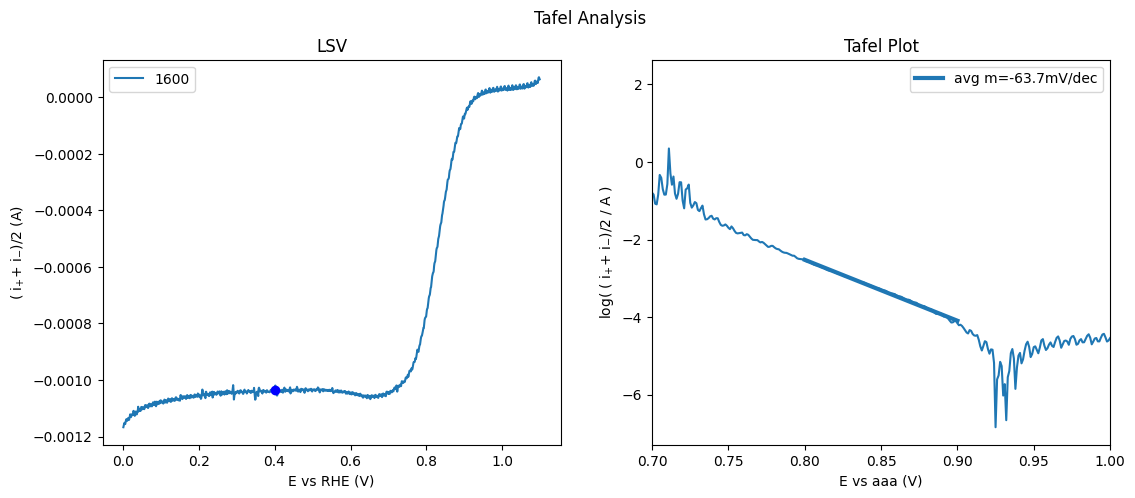

In [6]:

a =data.Tafel([0.8,0.9],0.4,RHE)
print("POS", a[0].value,a[1].value)

lsv = data.get_sweep(POS)
print(lsv.Tafel([0.8,0.9],0.4,RHE).value)
lsv = data.get_sweep(NEG)
print(lsv.Tafel([0.8,0.9],0.4,RHE).value)
lsv = data.get_sweep("AVG")
print(lsv.Tafel([0.8,0.9],0.4,RHE).value)

-3.152e+01 C m^-2


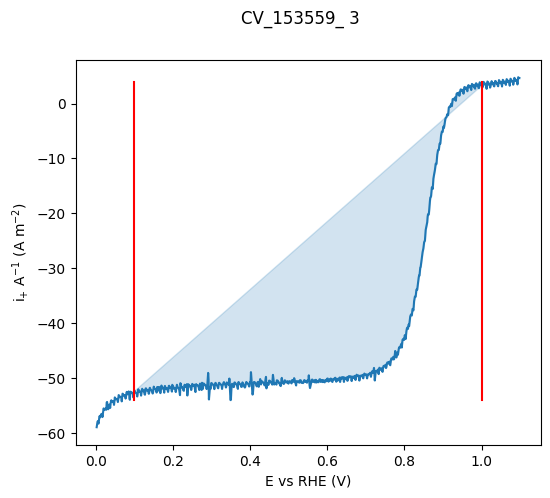

In [7]:
q= data.integrate(0.1,1, "pos","show_plot", "line","area",RHE)
print(q)

{'Current Range': '1mA', 'Control Mode': 'WE', 'Cell Switch': 'TRUE', 'Start': '0.000 V', 'Start_Delay': '0.000 s', 'V1': '1.100 V', 'V2': '0.000 V', 'Rate': '0.500 V/s', 'Nr of Sweeps': '3.00', 'Method.Duration': '13.2', 'Method.Cycle Duration': '4.4', 'Method.Avg.Time': '0.004', 'AC Frequency': '5.000E+3 Hz', 'AC Amplitude': '0.0050 V', 'RHE': '-0.938 V', 'Gas': 'O2', 'Temp_0': '298.15 K', 'Temp_1': '298.15 K', 'Pressure': '100000 Pa', 'Cell Material': 'Glass', 'CounterElectrode': 'Pt', 'Ref.Electrode': 'RHE', 'R.solution': '-1.00 Ohm', 'IR.compensation': '-1.00 Ohm', 'Electrolyte1': '0.1 M_HClO4: H2O_153', 'Electrolyte2': '_: _', 'Electrolyte3': '_: _', 'Electrode.Material': '', 'Electrode.Tip': '', 'Electrode.Area': '1.96E-5 m^2', 'Electrode.ExElectrode': '', 'Electrode.Cat.Loading': '0.00E+0 g m^-2', 'Electrode.Cat.Weight': '0.00E+0 g', 'Electrode.Cat.totWeight': '0.00E+0 g', 'Electrode.Cat.w%': '0.00', 'Electrode.Cat.Serial': '', 'Electrode.Cat.Batch': '', 'Electrode.Cat.Support'

(<matplotlib.lines.Line2D at 0x20b536db250>,
 <Axes: xlabel='E vs RHE (V)', ylabel='i (A)'>)

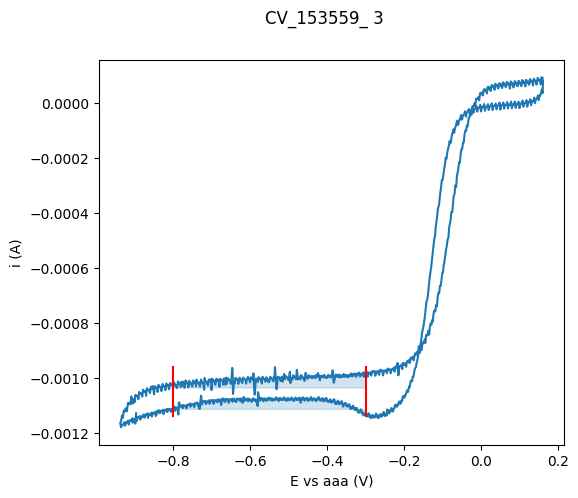

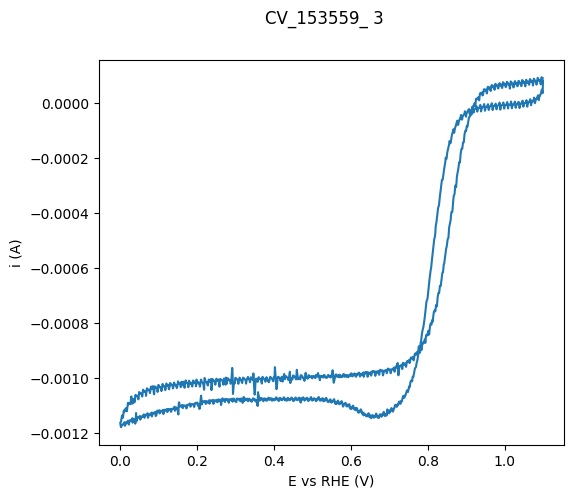

In [8]:
data.integrate(-0.8,-0.3, "offset_at_emin")
print(data.setup)
print(data.setup["RHE"])

data.set_RHE("-0.938 V")

data.plot(RHE)

-5.850e-02 V/dec
-5.787e-02 V/dec
58.502892179849034


np.True_

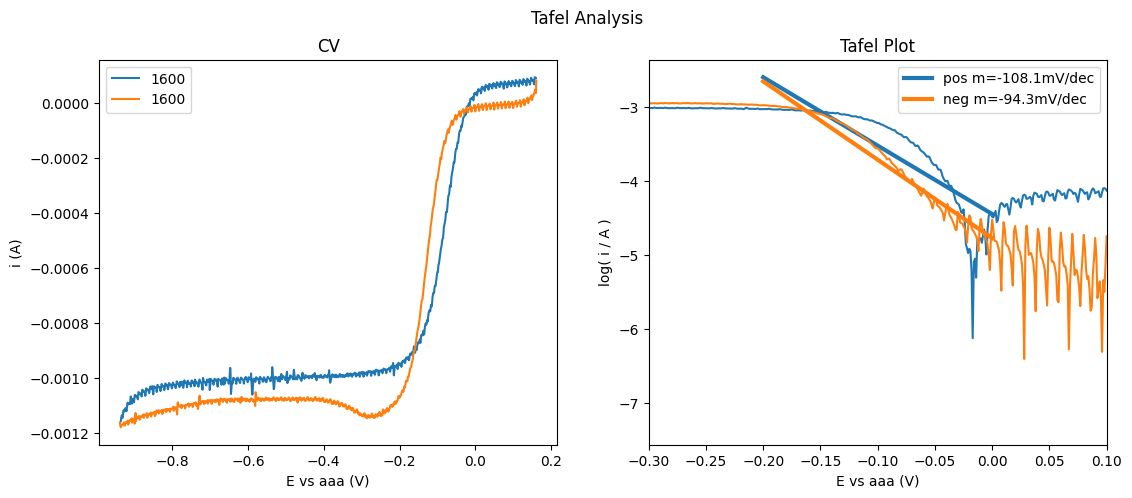

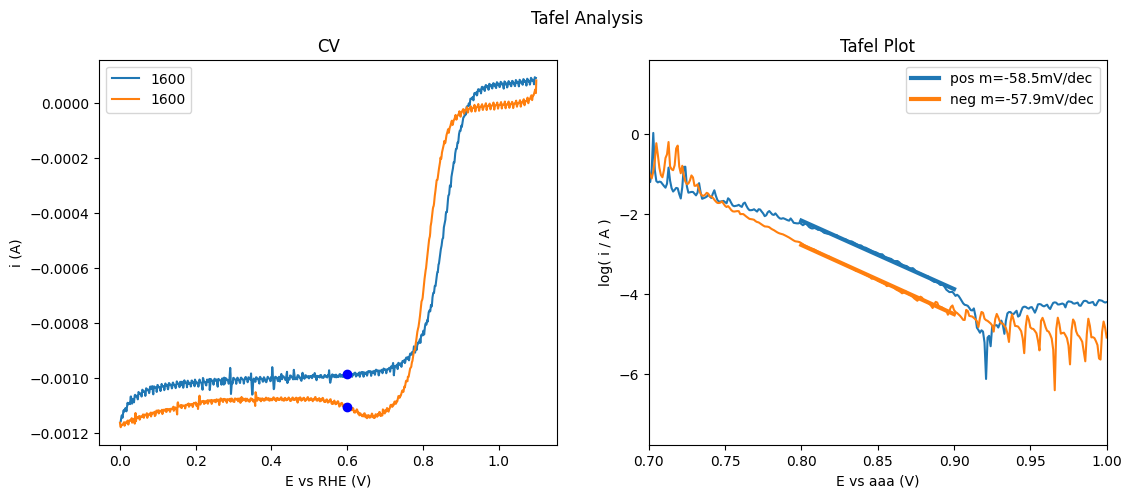

In [9]:
data.Tafel([-0.2,0])
k = data.Tafel([0.8,.9],0.6,RHE)
print(k[0])
print(k[1])
v=np.abs(k[0].value)*1000
print(v)
v>40 and v<140

In [10]:
data = CV_Data(paths[0])
data.pot_shift(RHE)
line, p = data.plot()
data.get_E_at_i(-0.0008,"pos",plot=p)
print("data",data.get_E_at_i(-0.0008,0,"pos"))
print(data.rotation)
(data.rate)

AttributeError: 'CV_Data' object has no attribute 'pot_shift'

In [ ]:
data = CV_Data(paths[0])
#data.plot()        
tolerance =0.0001
i = -0.0008
#get indexes where 
a = np.zeros_like(data.i_p)
a[ data.i_p < i-tolerance] = -1
a[ data.i_p > i+tolerance] = +1

idx= np.diff( a) # == 2 #finds where the difference is 2.

b = np.argwhere(data.i_p < i-tolerance)
c = np.argwhere(data.i_p > i+tolerance)
print("bmin", np.max(b))
print("cmin", np.min(c))

start = np.max(b)
end  = np.min(c)
print(start,end, start-end )
E_fit = data.E[start:end+1]
i_fit = data.i_p[start:end+1]
print(E_fit)
k,m = np.polyfit(i_fit, E_fit, 1)
print("E", m+k*i)
maxes= np.where(idx == 2)[0]
print(maxes)
ma = np.argmax(idx)
index = int(a[ma])
e =data.E[ma]
print("argmax",ma," a ", index, "E",e)

print("idx",len(idx))
print("a",len(a))
import matplotlib.pyplot as plt
plt.plot(E_fit,i_fit,".",[m+k*i],[i],"ro")
#This variable indexes the values of data where data crosses
#from below threshold-tol to above threshold+tol
#crossesAboveThreshold = wh[idx]